# Profil
Name: Farel Arden

In [187]:
import tensorflow as tf

In [1]:
!wget --no-check-certificate \
   https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [189]:
# melakukan ekstraksi pada file zip
import zipfile,os
LocZip = '/tmp/rockpaperscissors.zip'
ZipRef = zipfile.ZipFile(local_zip, 'r')
ZipRef.extractall('/tmp')
ZipRef.close()
 
BaseDir = '/tmp/rockpaperscissors'

In [190]:
from keras.preprocessing.image import ImageDataGenerator

ImageGenerator = ImageDataGenerator(
    horizontal_flip = True,
    validation_split = 0.4
)

In [193]:
imageTrain = ImageGenerator.flow_from_directory(
    BaseDir,
    target_size=(150, 150),
    classes=['rock', 'paper', 'scissors'],
    class_mode='categorical',
    subset='training'
)

imageVal = ImageGenerator.flow_from_directory(
    BaseDir,
    target_size=(150, 150),
    classes=['rock', 'paper', 'scissors'],
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [194]:
ImageModel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [195]:
ImageModel.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [196]:
ImageModel.fit(
      imageTrain,
      steps_per_epoch=20,  
      epochs=10, 
      validation_data=imageVal, 
      validation_steps=10,  
      verbose=1)

Epoch 1/10
20/20 [==============================] - 30s 1s/step - loss: 23.0854 - accuracy: 0.3859 - val_loss: 1.1403 - val_accuracy: 0.3281
Epoch 2/10
20/20 [==============================] - 27s 1s/step - loss: 1.0670 - accuracy: 0.5213 - val_loss: 1.1033 - val_accuracy: 0.3219
Epoch 3/10
20/20 [==============================] - 27s 1s/step - loss: 0.7792 - accuracy: 0.6738 - val_loss: 0.6442 - val_accuracy: 0.7781
Epoch 4/10
20/20 [==============================] - 27s 1s/step - loss: 0.4692 - accuracy: 0.8311 - val_loss: 0.4907 - val_accuracy: 0.8125
Epoch 5/10
20/20 [==============================] - 28s 1s/step - loss: 0.2913 - accuracy: 0.9047 - val_loss: 0.3132 - val_accuracy: 0.8687
Epoch 6/10
20/20 [==============================] - 28s 1s/step - loss: 0.1800 - accuracy: 0.9406 - val_loss: 0.1976 - val_accuracy: 0.9375
Epoch 7/10
20/20 [==============================] - 28s 1s/step - loss: 0.2119 - accuracy: 0.9328 - val_loss: 0.5915 - val_accuracy: 0.8000
Epoch 8/10
20/20 [=

In [197]:
print(train_image.class_indices) 

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (3).png
0CSaM2vL2cWX6Cay.png
Scissor


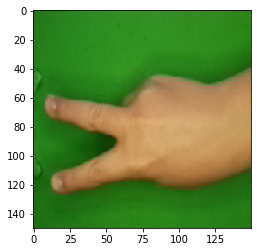

In [198]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)

  if classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2]:
    print('rock')
  elif classes[0][1]> classes[0][0] and classes[0][1] > classes[0][2]:
    print('paper')
  elif classes[0][2]> classes[0][0] and classes[0][2] > classes[0][1]:
    print('Scissor')